# Итоговое задание

   Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

   Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

   И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

## Описание датасета

1. `school` — аббревиатура школы, в которой учится ученик

2. `sex` — пол ученика ('F' - женский, 'M' - мужской)

3. `age` — возраст ученика (от 15 до 22)

4. `address` — тип адреса ученика ('U' - городской, 'R' - за городом)

5. `famsize` — размер семьи('LE3' <= 3, 'GT3' >3)

6. `Pstatus` — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. `Medu` — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. `Fedu` — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. `Mjob` — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. `Fjob` — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. `reason` — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. `guardian` — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. `traveltime` — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. `studytime` — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. `failures` — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. `schoolsup` — дополнительная образовательная поддержка (yes или no)

17. `famsup` — семейная образовательная поддержка (yes или no)

18. `paid` — дополнительные платные занятия по математике (yes или no)

19. `activities` — дополнительные внеучебные занятия (yes или no)

20. `nursery` — посещал детский сад (yes или no)

21. `higher` — хочет получить высшее образование (yes или no)

22. `internet` — наличие интернета дома (yes или no)

23. `romantic` — в романтических отношениях (yes или no)

24. `famrel` — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. `freetime` — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. `goout` — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. `health` — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. `absences` — количество пропущенных занятий

29. `score` — баллы по госэкзамену по математике

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
students = pd.read_csv('stud_math.xls')
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Первичная обработка данных

In [31]:
# Оцениваем количество уникальных значений и количество прусков
for column in students:
    null_percentage = 1 - len(students[column
                                      ].notnull()) /  len(students[column])
    print(students[column].value_counts(), '\n')
    if null_percentage > 0.1:
        print('Доля пропусков в столбце {i} - {j}'.format(i = column, 
                                                          j = null_percentage), '\n')

GP    349
MS     46
Name: school, dtype: int64 

F    208
M    187
Name: sex, dtype: int64 

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64 

U    295
R     83
Name: address, dtype: int64 

GT3    261
LE3    107
Name: famsize, dtype: int64 

T    314
A     36
Name: Pstatus, dtype: int64 

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64 

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64 

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64 

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64 

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64 

mother    250
father     86
other      28
Name: guardian, dtype: int64 

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64 

2.0    

* Замечены странные значения в `Fedu` (значение больше 4.0)
* Странное значение в `femrel`
* Количество пропусков некритично

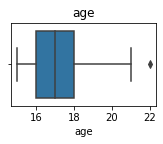

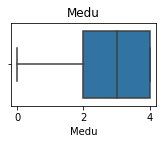

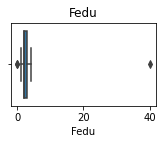

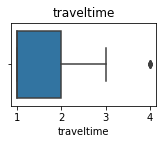

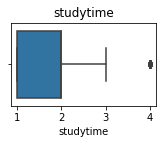

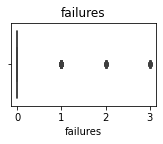

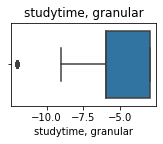

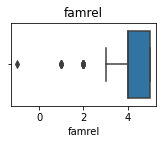

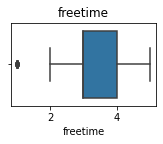

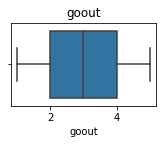

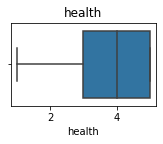

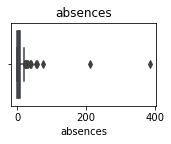

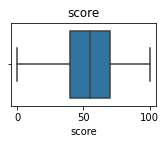

In [10]:
# Смотрим выбросы
for column in students:
    i = 0
    if np.dtype(students[column]) == 'float' or np.dtype(students[column]) == 'int64':
        i += 1
        plt.figure(figsize = (12, 7))
        plt.subplot(4, 4, i)
        sns.boxplot(students[column])
        plt.title(students[column].name)

Учитывая допустимые значения параметров и уже обозначенные аномалии, выбросов не выявлено.

In [49]:
# Заменяем опечатки на None
students[students.Fedu > 4]['Fedu'] = None

students[students.famrel < 1]['famrel'] = None


Значения параметра `studytime` не описаны. При нахождении корреляции между ним и `score`, будет выдвинута гипотеза об интерпретации этих значений.

## Корреляционный анализ

In [48]:
pd.DataFrame(students.corr().score[:-1])

,score
age,-0.155726
Medu,0.213349
Fedu,0.078573
traveltime,-0.070559
studytime,0.115741
failures,-0.344338
"studytime, granular",-0.115741
famrel,0.057112
freetime,0.019026
goout,-0.129685


`traveltime`, `Fedu`, `famrel`, `freetime`, `health`, `absences`: незначительная корреляция
Заметим, что образование матери имеет большее значение, чем образование отца

Нас будут интересовать следующие числовые параметры: `age`, `Medu`, `studytime`, `goout`

In [57]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(x = column, y = 'score', 
                data = students.loc[students.loc[:, column].isin(
                        students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [53]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


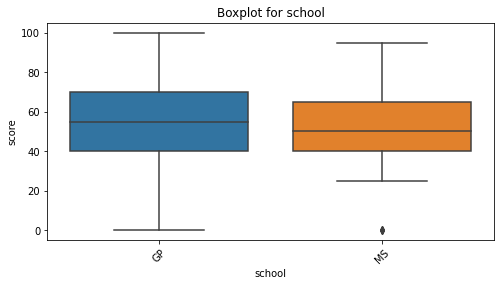

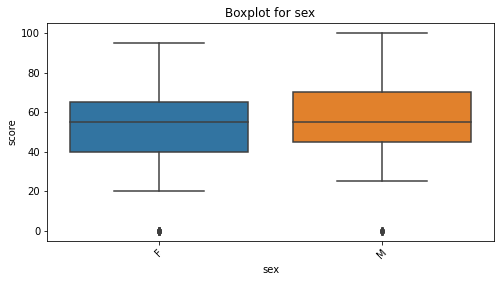

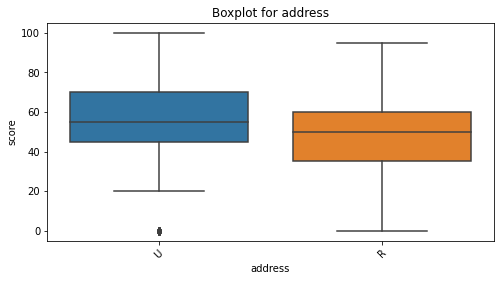

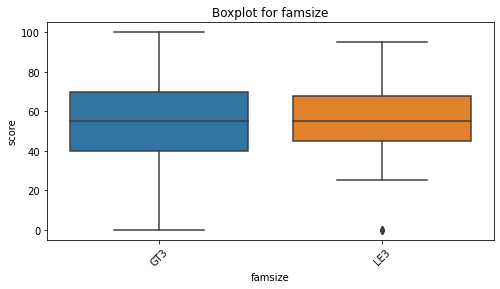

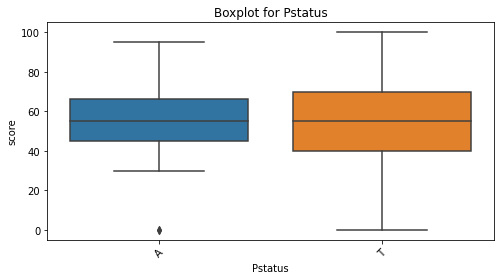

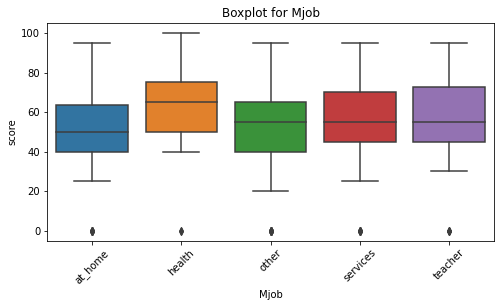

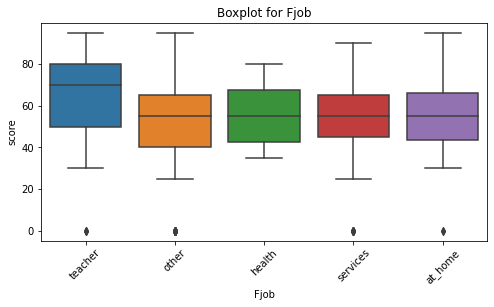

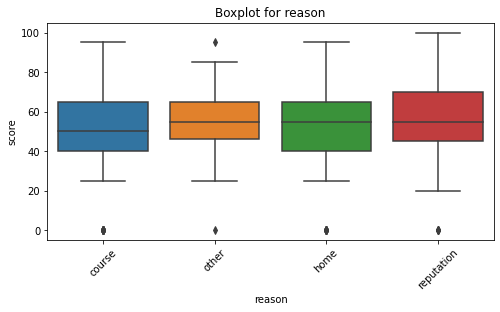

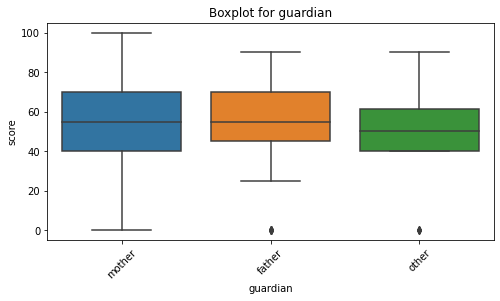

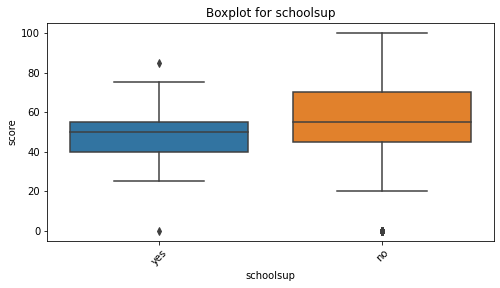

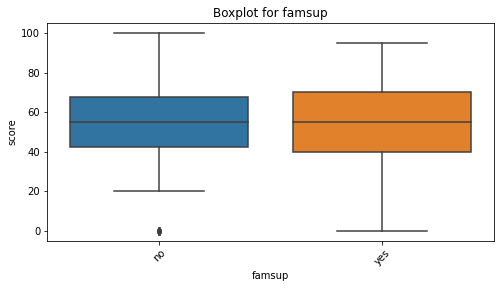

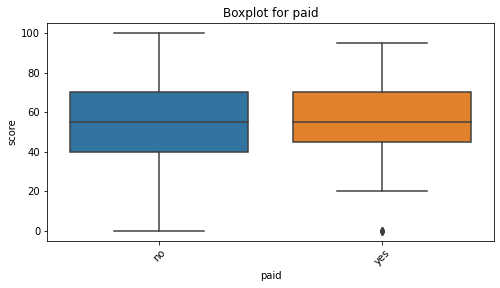

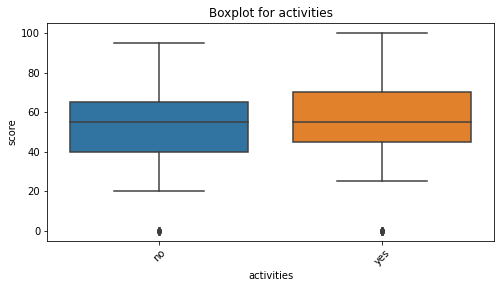

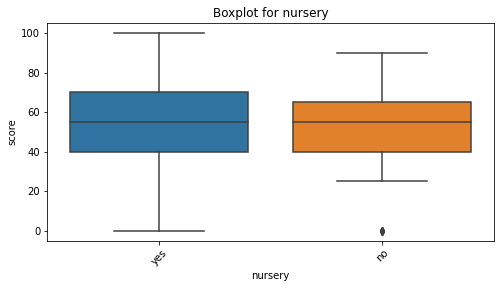

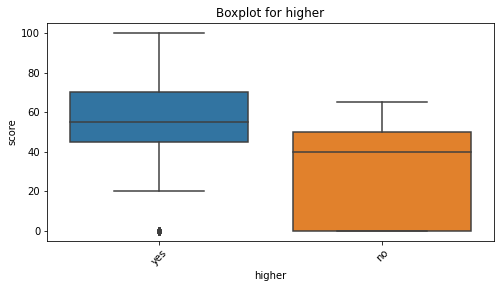

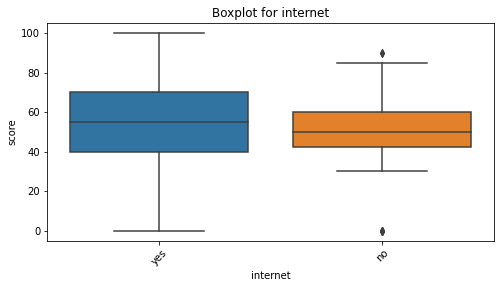

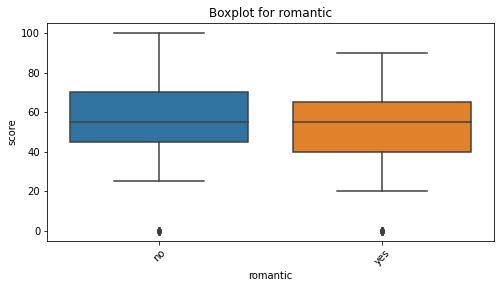

In [58]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Очевидны различия в `score` по признаку `higher`

!!!! ВНИМАНИЕ ВЕДУТСЯ ОБРАЗОВАТЕЛЬНЫЕ РАБОТЫ !!!!
Просьба не спускаться ниже